# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11244  100 11244    0     0  78810      0 --:--:-- --:--:-- --:--:-- 80314
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2844  100  2844    0     0  41671      0 --:--:-- --:--:-- --:--:-- 43753


In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

'head' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
%more train.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
1	0	1	1	1	0	0	0	1	1	1	0	1	1
0	1	1	0	1	0	1	1	1	1	1	1	1	1
0	0	1	1	0	0	1	0	0	1	1	1	1	0
1	0	1	1	0	0	1	1	0	1	0	0	1	1
0	0	1	1	0	0	0	0	1	0	1	1	1	0
1	0	0	0	0	0	1	0	1	1	0	1	1	0
0	1	1	1	1	1	0	0	1	0	1	0	1	1
1	0	0	0	1	0	1	1	1	1	1	1	1	0
1	0	0	0	0	1	1	0	1	1	1	1	1	0
1	0	0	1	0	1	0	1	1	0	0	1	1	0
0	0	1	1	0	1	1	0	0	0	0	1	1	0
1	1	1	0	0	1	1	1	1	1	0	1	1	1
0	1	1	1	1	1	0	0	0	1	0	1	1	0
0	0	1	1	0	1	0	1	0	1	1	1	1	0
1	0	0	1	0	1	1	1	1	0	0	1	1	0
0	0	1	0	0	0	1	0	0	0	0	0	1	0
1	0	1	0	0	0	1	1	0	0	0	1	1	0
1	0	0	0	0	1	0	0	0	1	0	1	1	0
1	0	0	0	1	1	1	0	0	1	0	1	1	0
1	0	0	0	0	0	1	1	1	1	1	0	1	0
0	0	1	1	0	1	0	1	0	0	1	0	1	0
0	1	1	0	0	0	1	1	1	1	0	1	1	0
0	0	0	0	1	1	1	1	0	0	0	0	1	0
0	1	1	0	1	1	1	1	0	0	0	1	1	0
0	1	0	1	0	0	0	1	0	0	0	1	1	0
1	0	

In [6]:
%more test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0
1	0	1	1	1	1	1	0	0	0	0	0	1	0
1	0	0	0	1	0	0	1	1	0	1	1	1	0
0	0	1	0	0	1	1	0	0	0	0	1	1	0
0	1	0	1	1	1	0	0	0	0	0	1	1	0
0	1	0	0	0	1	1	1	0	1	1	1	1	0
1	1	1	0	1	0	0	1	0	1	1	0	1	1
1	0	0	1	0	0	1	1	0	0	1	1	1	0
0	0	0	1	0	1	1	0	1	1	1	1	1	0
1	0	1	0	1	1	0	0	0	1	0	0	1	0
0	1	1	0	1	0	1	0	1	1	1	0	1	1
0	1	0	0	1	1	1	1	1	1	0	0	1	0
1	1	0	1	0	1	1	0	1	0	0	0	1	0
1	0	1	1	0	1	0	0	0	0	1	1	1	1
1	0	1	1	1	1	0	1	1	0	1	0	1	1
1	0	0	1	0	0	0	1	0	1	0	1	1	1
1	1	0	1	1	0	1	1	0	0	1	0	1	0
0	0	0	0	1	1	1	0	0	1	0	1	1	0
1	1	1	0	0	0	1	0	0	0	1	1	1	0
1	0	1	0	0	1	0	0	0	0	1	1	1	0
1	0	1	1	1	1	0	0	0	0	1	1	1	0
0	1	0	0	1	1	1	0	1	1	0	1	1	1
0	1	1	1	0	0	1	0	1	1	1	0	1	1
1	0	0	0	0	0	0	1	1	1	1	0	1	1
1	0	1	1	0	1	1	0	0	1	0	1	1	0
1	1	1	0	1	1	0	1	1	0	1	0	1	1
0	1	0

### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [9]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    result = 0
    for i in range(len(array1)):
        result+=array1[i] * array2[i]
    return result 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    result = 1 / (1 + math.exp(-x))
    return result

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    product = dot_product(weight , instance)
    funtion_output = sigmoid(product)
    return funtion_output

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    predict_value = output(weights , instance)

    if predict_value >= 0.5:
        return 1
    else:
        return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [10]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


In [13]:
instances_tr[0][-1]

0

## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

- The main aim of the perceptron is th update the weight based on the error from every row or instance , the predict funtion is converting the output into binay which is out the direct error , so we using the direct from the perceptron to update the weight before converting it into brinay values.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [17]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 10]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



In [20]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 10]     # number of epochs
lr_array = [0.001] # learning rate
test_accuracy  = []
for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
    test_accuracy.append(get_accuracy(weights, instances_te))

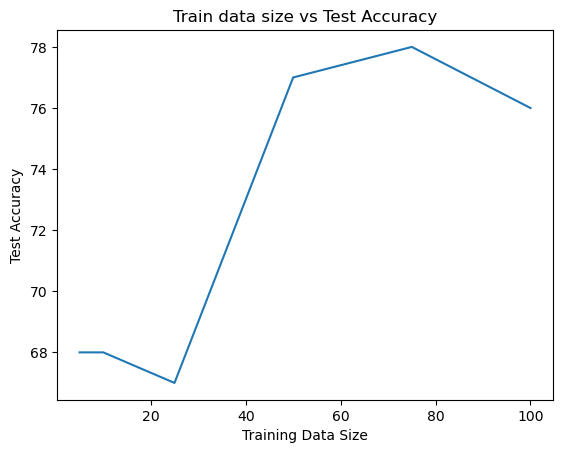

In [27]:
import matplotlib.pyplot as plt 
plt.plot(tr_percent , test_accuracy)
plt.xlabel("Training Data Size")
plt.ylabel("Test Accuracy")
plt.title("Train data size vs Test Accuracy")
plt.show()

- As we can see in the above plot , using 100 % of training data is leading to decreasing of test Accuracy. Training with all the data is nessarily a good choice , better accuracy can be Achieved be smaller dataset especially if the model starts overfitting when trained with a larger dataset.
- . Th2ndnd run obtaining worse accuracy despite using more training dat, can be consided as hyperparamter effect that is 2ns run the learning parameter is 0.005 which is less than the 1st learning rate 0.05 , so the model will be updating weight slower than 1st , as the epoch for the run is same , the 1st model for the same number of the epoch has updated fasted and went closer to the gobal min , but 2nd model has updated slowly and didnt reach the min.
  
- Yes , its possible to get higher accuracy with additional hyperparameters , model can get accuracy greater than 80% if the optimize the hypeparamters like learning rate, epochs and we aslo add some other hyperparamters like regularization and early stop to imprve the model accuracy.
  
- Its not alway worth training for more epoch while keeping all other hyperparamters fixed , training formore epoch can lead to overfitting , that is the model will learn pattern in traininig which include noise as well , so the gerenal error will be more.n 